# U.S. Import Volatility by Trading Partner
This notebook explores how U.S. import values fluctuate from month to month across several major trading partners.  Rather than focusing on long-term trends or specific policy events, the goal is to understand **volatility** (how stable or unstable import values appear over time).



Using monthly import data, the analysis compares China, Vietnam, Mexico, and Canada to see which countries experience larger short-term changes and which show more consistent import patterns. The focus is on organizing and visualizing the data in a clear, repeatable way.

This analysis is descriptive only. It is intended to highlight observed patterns in the data without drawing conclusions about causes, policy effectiveness, or future outomes.


## Load Libraries and Data

This section loads the Python libraries used in the analysis and reads in the monthly U.S import data.  The dataset contains import values by country and month, which will be used to calculate and compare volatility across trading partners.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#Load the dataset
imports = pd.read_csv(
    "imports_monthly_by_country.csv",
    parse_dates=['month_date']
)

#To provide consistency
imports['CTY_NAME'] = imports['CTY_NAME'].astype(str).str.upper().str.strip()
imports['import_value_usd'] = pd.to_numeric(imports['import_value_usd'],errors='coerce')

imports.head()


,CTY_CODE,CTY_NAME,month_date,import_value_usd
0,1220,CANADA,2010-01-01,21653836333
1,1220,CANADA,2010-02-01,21233211441
2,1220,CANADA,2010-03-01,24316311419
3,1220,CANADA,2010-04-01,23656975053
4,1220,CANADA,2010-05-01,23658132044


## Data Overview

Before performing any calculations, this section takes a closer look at the structure of the dataset.  Reviewing the available columns and countries help to confirm that the data is in the expected format and will support the planned volatility analysis.

In [5]:
imports.columns

Index(['CTY_CODE', 'CTY_NAME', 'month_date', 'import_value_usd'], dtype='object')

In [6]:
imports['CTY_NAME'].value_counts().head(10)

CTY_NAME
CANADA     191
CHINA      191
MEXICO     191
VIETNAM    191
Name: count, dtype: int64

Each row represents a single country and month, with the import value recorded in U.S. dollars. This analysis will be limited to a small set of major trading partners to keep comparisons manageable.

## Data Preparation
In this section , the dataset is prepared for volatility analysis. The data is focuses on a small set of major U.S. trading partners and sorted by country and month. Missing values are removed to ensure calculations are based on complete records.

In [9]:
#countries
comparison_countries = ['CHINA', 'VIETNAM', 'MEXICO', 'CANADA']

#filter to selected countries
imports_filtered = imports[
imports['CTY_NAME'].isin(comparison_countries)
].copy()

#sort by country and month
imports_filtered = imports_filtered.sort_values(
    ['CTY_NAME', 'month_date']
)

#remove rows with missing values
imports_filtered = imports_filtered.dropna(
    subset=['import_value_usd']
)

imports_filtered.head()

,CTY_CODE,CTY_NAME,month_date,import_value_usd
0,1220,CANADA,2010-01-01,21653836333
1,1220,CANADA,2010-02-01,21233211441
2,1220,CANADA,2010-03-01,24316311419
3,1220,CANADA,2010-04-01,23656975053
4,1220,CANADA,2010-05-01,23658132044


## Volatility Calculation

To measure volatility, this analysis looks at how much import values change from one month to the next for each country.  This is calculated using the month-over-month percent change in import values.

Percent change is a simple way to capture short-term movement. Larger positive or negative values indicate bigger swings between months, while values closer to zero indicate more stable import levels.

In [11]:
#calculates monthly percent change by country
imports_filtered['monthly_pct_change'] = (
    imports_filtered
    .groupby('CTY_NAME')['import_value_usd']
    .pct_change()
)

imports_filtered.head()

,CTY_CODE,CTY_NAME,month_date,import_value_usd,monthly_pct_change
0,1220,CANADA,2010-01-01,21653836333,NaN
1,1220,CANADA,2010-02-01,21233211441,-0.019425
2,1220,CANADA,2010-03-01,24316311419,0.145202
3,1220,CANADA,2010-04-01,23656975053,-0.027115
4,1220,CANADA,2010-05-01,23658132044,0.000049


## Visualizing Import Volatility
To compare volatility across countries, this section summarizes the average month over month percent change in import values for each trading partner.  Using an average allows differences in volatility to be compared clearly without relying on complex or noisy time-series charts.

Higher values indicate larger typical month-to-month changes, while lower values suggest more stable import patterns.

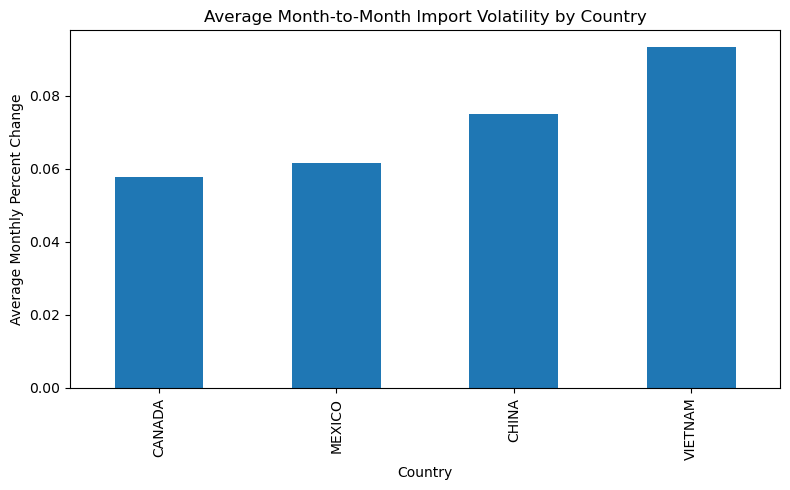

In [13]:
# Calculate average absolute month-over-month change by country
avg_volatility = (
    imports_filtered
    .groupby("CTY_NAME")["monthly_pct_change"]
    .apply(lambda x: x.abs().mean())
    .sort_values()
)

# Plot the bar chart
plt.figure(figsize=(8, 5))
avg_volatility.plot(kind="bar")

plt.title("Average Month-to-Month Import Volatility by Country")
plt.xlabel("Country")
plt.ylabel("Average Monthly Percent Change")

plt.tight_layout()
plt.show()

## Interpretation

The bar chart highlights differences in average month-to-month import volatility across the selected trading partners.  Some countries show larger rypical swings in import values, while others appear more stable over time.

This comparison does not explain why volatility differs across countries.  Instead, it provides a simple way to observe how consistent or variable import values tend to be when viewed month to month using the same measuring approach.

These results are best understood as descriptive patterns in the data rather than evidence of underlying causes or trade outcomes.

## Limitations and Scope
This analysis is based on monthly import data, which smooths over short-term fluctuations that may occur within a give month; it also focuces on import values and doesn't account for trade volume, pricing effects, logistics, or external events that could very well influence imports. This project is to simply demonstrate a clear, repeatable approach to measuring and comparing volatility using time-based data rather than draw to conclusions about trade performance or policy impacts. 